<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/ml-for-finance-intro/blob/main/2026/01-notebooks/nb-lesson-1-2.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Remote Data Access with Pandas

In [1]:
import numpy  as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Note on Library Conflicts and Versioning in Python  

When working with Python for financial data analysis, one common challenge is the potential conflict between different libraries. Many libraries depend on the same underlying packages, and sometimes different versions of these dependencies are not fully compatible with each other. This can lead to unexpected errors or even make your code stop working entirely when run on a different machine or after an update.  

To ensure that your work remains **portable and reproducible**, it is essential to **explicitly declare the versions** of the libraries you are using. This allows you and others to recreate the exact same environment in which your code was originally developed. The easiest way to do this is by checking the versions of the key libraries in your project, such as Pandas, NumPy, and others, using commands like:  

```python
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)
```

Additionally, when sharing or deploying your code, it is good practice to create a **requirements file** that lists all the necessary libraries and their versions. You can generate this file with:  

```bash
pip freeze > requirements.txt
```

This file can then be used to install the exact same versions of the required libraries on another system using:  

```bash
pip install -r requirements.txt
```

### Managing Conflicts with Python Environments 

A more advanced and standardized approach to managing library conflicts is to use **Python environments** (e.g., virtual environments with `venv` or `conda`). These allow you to create isolated spaces where different projects can have their own separate dependencies, avoiding conflicts between them. However, managing environments is outside the scope of this course. If you plan to work on multiple projects with different library requirements in the future, learning how to use virtual environments will be a valuable skill.

In [2]:
print("Actual matplotlib Version :", matplotlib.__version__, " - Original Notebook use 3.7.1")

Actual matplotlib Version : 3.7.1  - Original Notebook use 3.7.1


In [3]:
print("Actual pandas Version :", pd.__version__, " - Original Notebook use 2.2.3") 

Actual pandas Version : 2.2.3  - Original Notebook use 2.2.3


In [4]:
print("Actual numpy Version :", np.__version__, " - Original Notebook use 1.23.5")

Actual numpy Version : 1.26.4  - Original Notebook use 1.23.5


## Introduction

In this notebook, we will explore how to work with financial data stored on remote servers using Pandas, a powerful yet easy-to-use Python library for data analysis. In this presentation, we will see how Pandas can help you connect to remote data sources, pull in the financial information you need, and then organize and analyze that data. We will go through clear examples that show how to retrieve data from a distance and use Pandas to make sense of it, making the process both straightforward and effective. By the end of this talk, you'll understand the basics of remote data access and how Pandas can be a valuable tool in your financial analysis toolkit.

There are several free sources of financial and economic data that can be accessed remotely. One of the most widely used is Yahoo Finance, which provides historical stock prices, exchange rates, and market data through its API. The Federal Reserve Economic Data (FRED) platform offers a vast collection of economic indicators, including GDP, inflation, and interest rates. Another key resource is Alpha Vantage, which provides free access to stock market and forex data with an API key. Quandl (now part of Nasdaq Data Link) also offers various economic and financial datasets, though some may require a subscription.  

In this presentation, we will focus only on Yahoo Finance and FRED, as they are completely free and do not require an API key or registration, making them the easiest options for retrieving financial and economic data with Pandas.

## What is `pandas-datareader`


`pandas-datareader` is an extension to the popular `pandas` library in Python, designed to simplify the process of accessing and importing data from various financial and economic sources. It is particularly useful in data science and finance applications where real-time or historical data is required for analysis.

### Key Features of `pandas-datareader`

1. **Data Acquisition from Multiple Sources**:
   - Fetch financial data such as stock prices, indices, and exchange rates.
   - Access macroeconomic data like GDP, unemployment rates, and inflation.
   - Supported sources include Yahoo Finance, Alpha Vantage, World Bank, and FRED (Federal Reserve Economic Data).

<p></p>

2. **Seamless Integration with `pandas`**:
   - The data retrieved is returned as a `pandas.DataFrame` or `pandas.Series`, enabling immediate compatibility with pandas' analytical tools.
   - Built-in functionality to handle time-series data efficiently.

<p></p>

3. **Ease of Use**:
   - Simple API for fetching data with minimal setup.
   - Provides clear error messages for unsupported sources or connectivity issues.

<p></p>

4. **Customizable Queries**:
   - Retrieve data for specific time periods, tickers, or categories.
   - Filter results based on user-defined criteria.

### Installation

To use `pandas-datareader`, install it via pip:
```bash
pip install pandas-datareader
```

### Core Functions

Here are some of the key functionalities provided by `pandas-datareader`, for the full list follow this [link](https://pandas-datareader.readthedocs.io/en/latest/) to the documentation web page.

In [5]:
import pandas_datareader

print("Actual pandas_datareader Version :", pandas_datareader.__version__, " - Original Notebook use 0.10.0")

Actual pandas_datareader Version : 0.10.0  - Original Notebook use 0.10.0


In [6]:
from pandas_datareader import data as pdr

#### Accessing Macroeconomic Data

Fetch economic indicators such as interest rates or GDP data from FRED. The St. Louis [FRED](https://fred.stlouisfed.org/) (Federal Reserve Economic Data) is a comprehensive online database managed by the Federal Reserve Bank of St. Louis. It provides free access to a vast collection of economic and financial data that spans across various sectors, geographies, and time periods.

FRED is widely used by economists, researchers, analysts, and students to retrieve historical data for analysis, visualization, and forecasting.

---

<div align='center'>
<img src="./pic/lesson-1-2_pic_0.png" width=600px />
</div>

In [7]:
# Example: Retrieve US unemployment rate data
unemployment_data = pdr.get_data_fred('UNRATE', start='2000-01-01', end='2026-01-01')
print(unemployment_data)

            UNRATE
DATE              
2000-01-01     4.0
2000-02-01     4.1
2000-03-01     4.0
2000-04-01     3.8
2000-05-01     4.0
...            ...
2025-09-01     4.4
2025-10-01     NaN
2025-11-01     4.5
2025-12-01     4.4
2026-01-01     4.3

[313 rows x 1 columns]


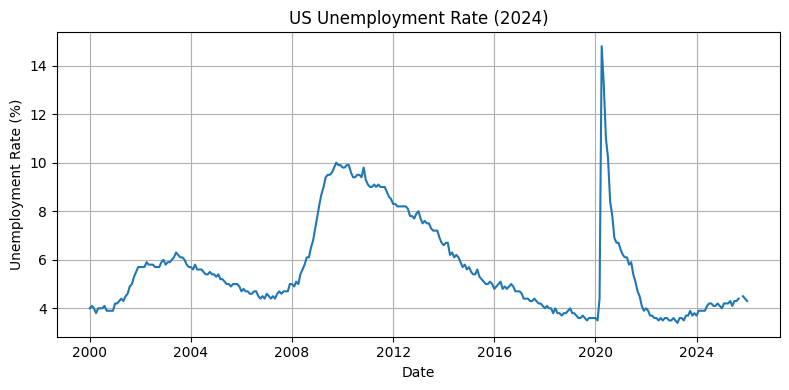

In [8]:
# Plot
plt.figure(figsize=(8, 4))
plt.plot(unemployment_data.index, unemployment_data["UNRATE"])
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("US Unemployment Rate (2024)")
plt.grid(True)
plt.tight_layout()
plt.show()

The figure shows the evolution of the U.S. unemployment rate over time.
After a moderate increase in the early 2000s, unemployment rises sharply during the 2008–2009 financial crisis, peaking around 10%, reflecting the severity of the Great Recession.
This is followed by a long and gradual decline throughout the 2010s, reaching historically low levels just before 2020.
The sudden and extreme spike in 2020 corresponds to the COVID-19 pandemic, when unemployment briefly surged to unprecedented levels due to widespread economic shutdowns.
Subsequently, the labor market recovered relatively quickly, with unemployment returning close to pre-pandemic levels, although a mild upward drift is visible in the most recent period.

In [9]:
# Example: Fetching the U.S. 10-Year Treasury Yield
# The FRED series ID for the 10-year Treasury yield is "DGS10".
import pandas_datareader as pdr
import datetime

# Define the time period
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2026, 1, 1)
# Fetch 10-Year Treasury Yield data from FRED
interest_rates = pdr.data.DataReader("DGS10", "fred", start_date, end_date)
# Display the first few rows
interest_rates.head(5)

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52


**Explanation:**

- `"DGS10"` → FRED series ID for the **10-Year Treasury Constant Maturity Rate**.

- `"fred"` → Specifies that we’re pulling data from the **FRED database**.

- `start_date, end_date` → Defines the time range for the data.

In [10]:
# Example: Fetching Multiple Interest Rate Series
# You can request multiple interest rate series at once by passing a list of series IDs.

# List of interest rate series IDs
series_ids = ["DGS10", "DGS2", "DGS3MO"]  # 10Y, 2Y, and 3-Month Treasury rates
# Fetch data
rates = pdr.data.DataReader(series_ids, "fred", start_date, end_date)
# Print the first few rows
rates.head()

,DGS10,DGS2,DGS3MO
DATE,,,
2000-01-03,6.58,6.38,5.48
2000-01-04,6.49,6.30,5.43
2000-01-05,6.62,6.38,5.44
2000-01-06,6.57,6.35,5.41
2000-01-07,6.52,6.31,5.38


**FRED Series IDs:**

- `"DGS10"` → **10-Year Treasury Rate**

- `"DGS2"` → **2-Year Treasury Rate**

- `"DGS3MO"` → **3-Month Treasury Rate**

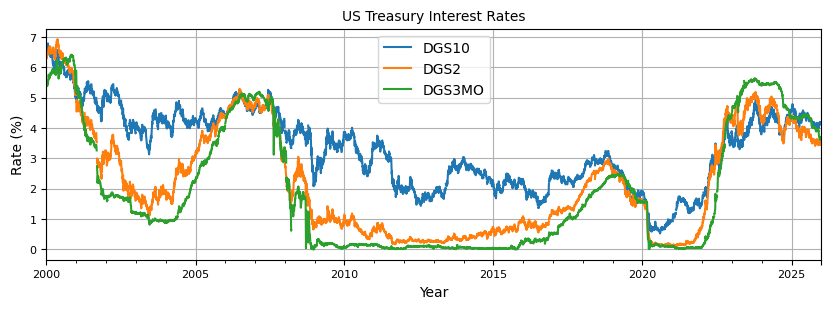

In [11]:
# Example: Plotting the Interest Rate Data
# To visualize how interest rates change over time:
import matplotlib.pyplot as plt

# Plot the interest rate trends
rates.plot(figsize=(10, 3), fontsize=8) 
plt.title("US Treasury Interest Rates", fontsize=10)
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.grid()
plt.show()

The figure shows U.S. Treasury yields at short, medium, and long maturities from 2000 to the present.
Over the long run, yields display a clear downward trend from the early 2000s until the late 2010s, reflecting declining inflation expectations, accommodative monetary policy, and strong demand for safe assets.
The yield curve undergoes several episodes of flattening and inversion, particularly before major economic slowdowns, such as the 2007–2008 financial crisis and the period preceding the COVID-19 shock.
Following the Global Financial Crisis, short-term rates remain near zero for an extended period, while long-term yields stay low but positive, indicating persistent monetary accommodation and subdued growth expectations.
The sharp rise in yields after 2021 reflects a regime shift driven by high inflation and aggressive monetary tightening, with rates increasing rapidly across all maturities before partially stabilizing in the most recent period.

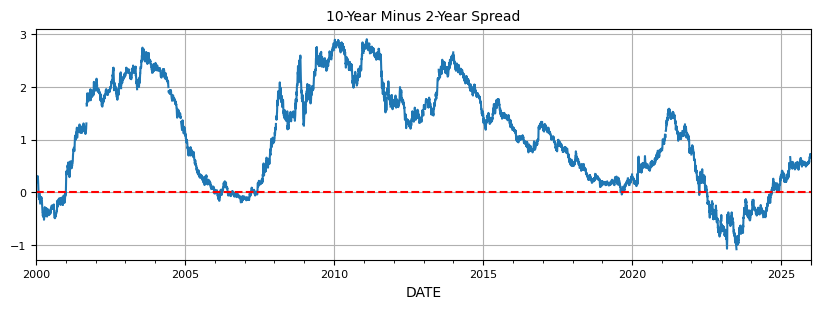

In [12]:
# Example: Calculating Interest Rate Spread
# You can analyze the yield curve by computing spreads, such as the 10-Year minus 2-Year Treasury yield:
# Calculate the yield spread (10Y - 2Y)
rates["Spread_10Y_2Y"] = rates["DGS10"] - rates["DGS2"]
# Plot the spread
rates["Spread_10Y_2Y"].plot(figsize=(10, 3), fontsize=8)
plt.title("10-Year Minus 2-Year Spread", fontsize=10)
plt.axhline(0, color="red", linestyle="--")  # Mark zero line
plt.grid()
plt.show()

In [13]:
print(rates[["DGS10", "DGS2", "Spread_10Y_2Y"]].isna().sum())
print(len(rates))

DGS10            282
DGS2             282
Spread_10Y_2Y    282
dtype: int64
6784


In [14]:
rates[["DGS10", "DGS2"]] = rates[["DGS10", "DGS2"]].ffill()
rates["Spread_10Y_2Y"] = rates["DGS10"] - rates["DGS2"]

In [15]:
print(rates[["DGS10", "DGS2", "Spread_10Y_2Y"]].isna().sum())
print(len(rates))


DGS10            0
DGS2             0
Spread_10Y_2Y    0
dtype: int64
6784


In [16]:
# Moving averages (in trading days)
rates["MA_3M"]  = rates["Spread_10Y_2Y"].rolling(window=63).mean()
rates["MA_6M"]  = rates["Spread_10Y_2Y"].rolling(window=126).mean()
rates["MA_12M"] = rates["Spread_10Y_2Y"].rolling(window=252).mean()

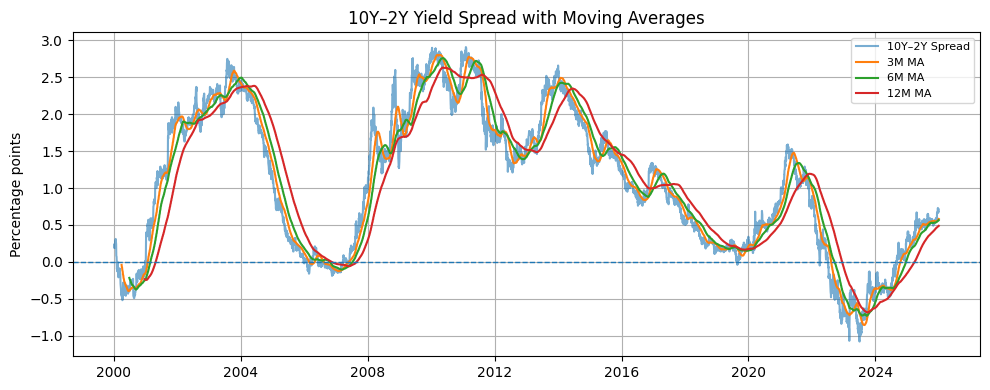

In [17]:
plt.figure(figsize=(10, 4))

plt.plot(rates.index, rates["Spread_10Y_2Y"], label="10Y–2Y Spread", alpha=0.6)
plt.plot(rates.index, rates["MA_3M"],  label="3M MA")
plt.plot(rates.index, rates["MA_6M"],  label="6M MA")
plt.plot(rates.index, rates["MA_12M"], label="12M MA")

plt.axhline(0, linestyle="--", linewidth=1)
plt.title("10Y–2Y Yield Spread with Moving Averages")
plt.ylabel("Percentage points")
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

**Why this matters?**  

- A **negative spread** (inverted yield curve) often signals **recession risks**.

#### World Bank Data

Retrieve global economic indicators from the World Bank:

---

<div align='center'>
<img src="./pic/lesson-1-2_pic_1.png" width=600px />
</div>

The following Python script retrieves **World Bank GDP data** for the **United States** from **2010 to 2022** using the `pandas_datareader` library and formats it for readability.

<p>
    
1. **Import World Bank Data Module:**
   ```python
   from pandas_datareader import wb
   ```
   - This imports the `wb` module from `pandas_datareader`, which allows retrieving economic indicators from the **World Bank**.

<p>
    
2. **Retrieve GDP Data:**
   ```python
   gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country=['US'], start=2010, end=2022)
   ```
   - The `wb.download()` function is used to fetch **Gross Domestic Product (GDP)** data:
     - `'NY.GDP.MKTP.CD'` → GDP in **current US dollars**.
     - `country=['US']` → Fetches data for the **United States**.
     - `start=2010, end=2022` → Gets annual GDP values from **2010 to 2022**.

<p>
    
3. **Format GDP for Readability:**
   ```python
   gdp_data['NY.GDP.MKTP.CD'] = gdp_data['NY.GDP.MKTP.CD'].apply(lambda x: f"{x:,.0f}")
   ```
   - Applies **thousands separator formatting** to GDP values (e.g., **"21,000,000,000,000"** instead of **"21000000000000"**).
   - `.apply(lambda x: f"{x:,.0f}")`:
     - Uses **Python string formatting** to insert commas every three digits.


In [18]:
# Example: Retrieve World Bank GDP data for a specific country
from pandas_datareader import wb

gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country=['US'], start=2010, end=2022)
# Format the GDP with points separating thousands
gdp_data['NY.GDP.MKTP.CD'] = gdp_data['NY.GDP.MKTP.CD'].apply(lambda x: f"{x:,.0f}")
# Print the formatted GDP data
print(gdp_data.head())

                        NY.GDP.MKTP.CD
country       year                    
United States 2022  25,604,848,907,611
              2021  23,315,080,560,000
              2020  21,060,473,613,000
              2019  21,380,976,119,000
              2018  20,533,057,312,000


**Python Pills**

The format string `f"{x:,.0f}"` in Python is an **f-string** with specific formatting instructions for numbers. Let's break it down:

**Explanation of `f"{x:,.0f}"`**
- `f""` → This is an **f-string**, meaning that any expression inside `{}` will be evaluated and formatted in place.
- `x` → This is the variable being formatted.
- `:` → This separates the value from the format specification.
- `,` → This adds a **thousands separator** (commas in English notation).
- `.0f` → This means:
  - `.0` → Round to **zero decimal places**.
  - `f` → Format the number as a **fixed-point decimal**.

**Example Usage**
```python
x = 1234567.89

formatted_x = f"{x:,.0f}"
print(formatted_x)  # Output: "1,234,568"
```
- The number is rounded to `1,234,568` because `.0f` means no decimal places.
- The comma separator makes it easier to read large numbers.

**Comparison with Other Formats**
| Format String | Explanation | Example Output (if `x = 1234567.89`) |
|--------------|-------------|-----------------|
| `f"{x:,.2f}"` | Adds thousands separator and keeps **2 decimal places** | `"1,234,567.89"` |
| `f"{x:.0f}"` | No separator, rounded to **0 decimal places** | `"1234568"` |
| `f"{x:,}"` | Adds separator but keeps **default decimal places** (if float) | `"1,234,567.89"` |

#### Google and Alpha Vantage (Deprecated or API Key Required)

Some sources (like Google Finance) are no longer supported due to service changes. For Alpha Vantage, you need an API key:
```python
# Example with Alpha Vantage
alpha_vantage_data = pdr.av.time_series.AVTimeSeriesReader(symbols='AAPL', api_key='YOUR_API_KEY')
print(alpha_vantage_data.read())
```

### Advantages

1. **Efficient Data Retrieval**:
   - Simplifies the process of obtaining structured financial data.
   - Automates repetitive data-fetching tasks.

2. **Broad Range of Data Sources**:
   - Supports multiple reliable data providers, from economic databases to financial services.

3. **Time-Series Handling**:
   - Data is formatted as `pandas` time-series objects, allowing easy manipulation and plotting.

4. **Customizable Queries**:
   - Specify date ranges, frequency, and fields of interest.


### Common Challenges

1. **API Key Requirements**:
   - Some sources like Alpha Vantage require API keys, which may have rate limits.

2. **Deprecated Sources**:
   - Certain data providers (e.g., Google Finance) are no longer supported.

3. **Connectivity Issues**:
   - Retrieval may fail if the data provider is down or the API service changes.

4. **Data Cleaning**:
   - While the data is structured, some sources may require additional cleaning for specific use cases.

### Alternatives

If `pandas-datareader` doesn’t meet your needs, consider alternatives:
- **`yfinance`**: A more robust tool for Yahoo Finance data.
- **`Quandl`**: High-quality financial, economic, and alternative datasets (requires API key).
- **`alpha_vantage`**: Python library specifically for Alpha Vantage (requires API key).

### Best Practices

1. **Check for Updates**:
   - Ensure you’re using the latest version of `pandas-datareader` as data source APIs frequently change.

2. **Error Handling**:
   - Wrap calls in try-except blocks to handle connectivity or API errors gracefully.
   ```python
   try:
       stock_data = pdr.get_data_yahoo('AAPL', start='2022-01-01', end='2023-01-01')
   except Exception as e:
       print(f"Error fetching data: {e}")
   ```

3. **Use with Larger Pipelines**:
   - Combine `pandas-datareader` with libraries like `numpy` and `matplotlib` for advanced analytics and visualization.

### Some Others Example with FRED

#### The VIX Index

**What is the VIX Index?**

The **VIX Index**, often referred to as the "Fear Index" or "Fear Gauge," is a financial benchmark that represents the market's expectation of volatility over the next 30 days. It is derived from the prices of options on the **S&P 500 Index (SPX)**. The VIX is widely used as a measure of market sentiment, particularly investor fear or uncertainty.

**Key Features of the VIX Index**

**1. Calculation**

- The VIX is calculated by the Chicago Board Options Exchange (CBOE) using a weighted average of the implied volatilities of a wide range of SPX call and put options.
- It reflects the market's expectations of future price fluctuations, not the actual or historical volatility of the S&P 500.

**2. Volatility as an Asset Class**

- A higher VIX indicates increased market uncertainty and fear, often correlating with significant market downturns or events.
- A lower VIX suggests calm market conditions, indicating lower expected price swings.

**Interpreting VIX Values**

- **Low VIX (<15)**: Suggests stability and investor confidence in the market.
- **Moderate VIX (15–25)**: Indicates average levels of market uncertainty or expected volatility.
- **High VIX (>25)**: Reflects elevated uncertainty, often due to geopolitical events, economic crises, or market shocks.

**Why the VIX Matters**

1. **Market Sentiment Indicator**:
   - The VIX is often used as a barometer for investor sentiment. A rising VIX signals fear and potential risk-off behavior, while a declining VIX suggests confidence.
   
2. **Hedging and Speculation**:
   - Traders and portfolio managers use the VIX for hedging portfolios or speculating on future market volatility via derivatives such as VIX futures, options, or exchange-traded products (ETPs).
   
3. **Leading Indicator**:
   - The VIX can sometimes act as a leading indicator for equity market movements, as spikes in the VIX often precede sharp market declines.

**Practical Applications**

1. **Portfolio Protection**:
   Investors use VIX options or futures to hedge against downside risks in their equity portfolios.
   
2. **Volatility-Based Strategies**:
   Quantitative traders use the VIX in strategies like volatility arbitrage or pairs trading with other volatility instruments.

3. **Economic Analysis**:
   Economists and analysts observe the VIX to gauge market reactions to macroeconomic news, Federal Reserve decisions, or geopolitical developments.

In [19]:
# Setting the beginning and end of the historical data
start_date = '1990-01-01'
end_date   = '2023-01-23'
# Creating a dataframe and downloading the VIX data
vix = pdr.DataReader('VIXCLS', 'fred', start_date, end_date)
# Calculating the number of nan values
count_nan = vix['VIXCLS'].isnull().sum()
# Printing the result
print('Number of nan values in the VIX dataframe: ' + str(count_nan))
# Printing the latest five observations of the dataframe
vix.tail()

Number of nan values in the VIX dataframe: 292


,VIXCLS
DATE,
2023-01-17,19.36
2023-01-18,20.34
2023-01-19,20.52
2023-01-20,19.85
2023-01-23,19.81


In [20]:
# Dropping the NaN values from the rows
vix = vix.dropna()
# Taking the differences in an attempt to make the data stationary
# (see appendix for a description of the diff method)
vix = vix.diff(periods = 1, axis = 0)
# Dropping the first value of the data frame
# This statement modifies vix by selecting a subset of its rows and
# columns using .iloc[], which is used for integer-based indexing in Pandas.
# Remember python slicing-> [1:, ] (Row selection) → Excludes the first row (index 0) and keeps all rows from index 1 onward.
#                           [, : ] (Column selection) → Selects all columns.
vix = vix.iloc[1: , :]
# Calculating the mean of the dataset
mean = vix["VIXCLS"].mean()
# Printing the result
print('The mean of the dataset = ' + str(mean))

The mean of the dataset = 0.00030844935189630385


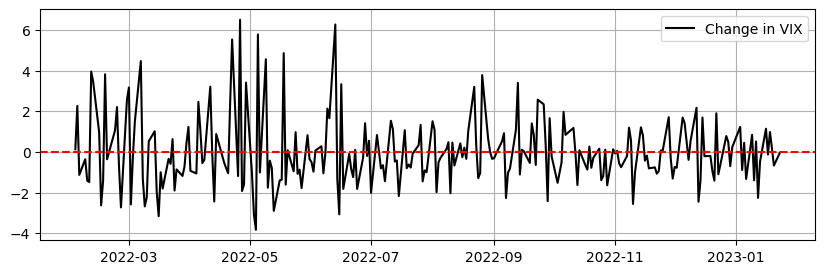

In [21]:
plt.figure(figsize=(10,3))
# Plotting the latest 250 observations in black with a label
# Note the negative index ...
plt.plot(vix[-250:], color = 'black', linewidth = 1.5, label = 'Change in VIX')
# Plotting a red dashed horizontal line that is equal to mean
plt.axhline(y = mean, color = 'red', linestyle = 'dashed')
# Calling a grid to facilitate the visual component
plt.grid()
# Calling the legend function so it appears with the chart
plt.legend()
# Calling the plot
plt.show()

#### CPIAUCSL Data in the FRED Database

The CPIAUCSL is a dataset in the FRED (Federal Reserve Economic Data) database representing the **Consumer Price Index for All Urban Consumers: All Items, Seasonally Adjusted**. It is a key economic indicator published by the Bureau of Labor Statistics (BLS) and provides a measure of the average change in prices paid by urban consumers for a broad basket of goods and services over time. The CPIAUCSL measures inflation by tracking the price changes of goods and services consumed by urban households, which comprise about 93% of the U.S. population.

**Data Characteristics**

- Frequency: Monthly
- Units: Index (1982–1984 = 100) The base period is set to 1982–1984, meaning the average index value during that period is 100.
- Seasonal Adjustment: The data is adjusted for predictable seasonal patterns to provide a clearer picture of underlying trends.

In [22]:
# Setting the beginning and end of the historical data
start_date = '1950-01-01'
end_date   = '2023-01-23'

# Creating a dataframe and downloading the CPI data
cpi = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)

# Printing the latest five observations of the dataframe
print(cpi.tail())

            CPIAUCSL
DATE                
2022-09-01   296.349
2022-10-01   298.007
2022-11-01   298.786
2022-12-01   298.832
2023-01-01   300.420


In [23]:
# Checking if there are nan values in the CPI dataframe
count_nan = cpi['CPIAUCSL'].isnull().sum()

# Printing the result
print('Number of nan values in the CPI dataframe: ' + str(count_nan))

# Transforming the CPI into a year-on-year measure
# The pct_change() method in Pandas calculates the
# percentage change between consecutive elements in
# a Series or DataFrame.
cpi = cpi.pct_change(periods = 12, axis = 0) * 100

# Dropping the nan values from the rows
cpi = cpi.dropna()

Number of nan values in the CPI dataframe: 0


In [24]:
print("\n" + 100*"-")
print("Dataframe BEFORE index resetting")
print(100*"-")
cpi.head()


----------------------------------------------------------------------------------------------------
Dataframe BEFORE index resetting
----------------------------------------------------------------------------------------------------


,CPIAUCSL
DATE,
1951-01-01,7.954062
1951-02-01,9.402795
1951-03-01,9.475465
1951-04-01,9.598309
1951-05-01,9.339504


In [25]:
# Resetting the index
cpi = cpi.reset_index()
print("\n"+100*"-")
print("Dataframe AFTER index resetting")
print(100*"-")
cpi.head()


----------------------------------------------------------------------------------------------------
Dataframe AFTER index resetting
----------------------------------------------------------------------------------------------------


,DATE,CPIAUCSL
0,1951-01-01,7.954062
1,1951-02-01,9.402795
2,1951-03-01,9.475465
3,1951-04-01,9.598309
4,1951-05-01,9.339504


<function matplotlib.pyplot.show(close=None, block=None)>

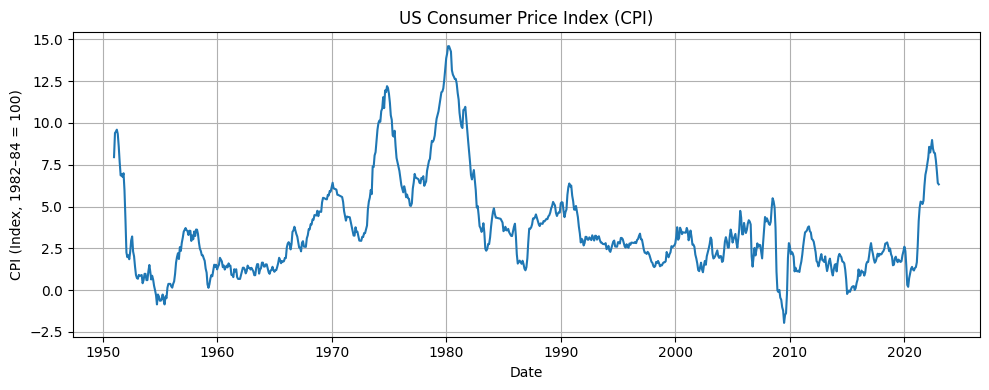

In [26]:
plt.figure(figsize = (10,4))
#plt.plot(cpi.index, cpi['CPIAUCSL'])
plt.plot(cpi['DATE'], cpi['CPIAUCSL'])
plt.xlabel("Date")
plt.ylabel("CPI (Index, 1982–84 = 100)")
plt.title("US Consumer Price Index (CPI)")
plt.grid(True)
plt.tight_layout()
plt.show

Let's make some comparison with the UK using che `GBRCPIALLMINMEI` index. The GBRCPIALLMINMEI dataset in the FRED (Federal Reserve Economic Data) database represents the Consumer Price Index (CPI) for All Items in the United Kingdom, not seasonally adjusted. It is a measure of the average change over time in the prices paid by consumers in the UK for a broad basket of goods and services.

In [27]:
# Setting the beginning and end of the historical data
start_date = '1995-01-01'
end_date   = '2022-12-01'

In [28]:
# Creating a dataframe and downloading the CPI data using its code name and its source
cpi_us = pdr.DataReader('CPIAUCSL', 'fred', start_date, end_date)
cpi_uk = pdr.DataReader('GBRCPIALLMINMEI', 'fred', start_date, end_date)

In [29]:
# Dropping the NaN values from the rows
cpi_us = cpi_us.dropna()
cpi_uk = cpi_uk.dropna()

In [30]:
# Transforming the CPI into a year-on-year measure
cpi_us = cpi_us.pct_change(periods = 12, axis = 0) * 100
cpi_us = cpi_us.dropna()
cpi_uk = cpi_uk.pct_change(periods = 12, axis = 0) * 100
cpi_uk = cpi_uk.dropna()

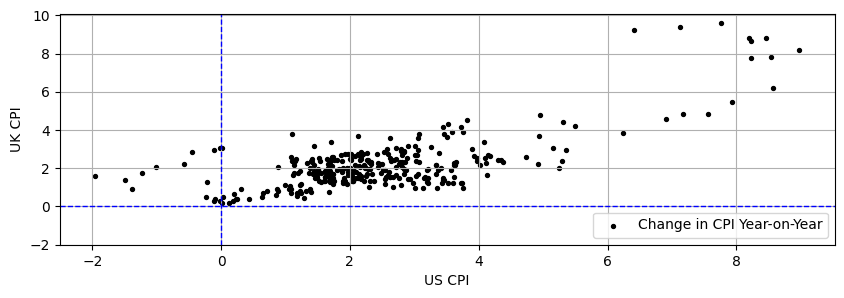

In [31]:
# Creating the chart
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(cpi_us['CPIAUCSL'], cpi_uk['GBRCPIALLMINMEI'], color = 'black', s = 8, label = 'Change in CPI Year-on-Year')
# Adding a few aesthetic elements to the chart
ax.set_xlabel('US CPI')
ax.set_ylabel('UK CPI')
ax.axvline(x = 0, color='blue', linestyle = 'dashed', linewidth = 1)  # vertical line
ax.axhline(y = 0, color='blue', linestyle = 'dashed', linewidth = 1)  # horizontal line
ax.set_ylim(-2,)
# Calling the grid function for better interpretability
plt.grid()
# Calling the legend function to show the labels
plt.legend()
# Showing the plot
plt.show()

## What are Bars?

In the context of **financial data structures**, the term **BAR** refers to a fundamental unit of time-based price data used primarily in **technical analysis** and charting. A "bar" aggregates market data over a specific period, such as a minute, an hour, a day, or even a week, to represent price movements for that duration. Generally, each bar contains four key price components:

1. **Open Price**: The price at which the first trade occurred during the bar's time period.  
2. **High Price**: The highest price reached during the bar's time period.  
3. **Low Price**: The lowest price reached during the bar's time period.  
4. **Close Price**: The price at which the last trade occurred during the bar's time period.  

Together, these four prices form what is known as an **OHLC** bar (Open-High-Low-Close). Each bar also includes a **volume** component, representing the total quantity of assets traded during that period.

### Visual Representation of a BAR  

- **Body**: A vertical line between the high and low prices indicates the price range for the time period.  
- **Tick marks**:
   - A small horizontal tick to the left represents the **open price**.
   - A small horizontal tick to the right represents the **close price**.

<div align='center'>
<img src="./pic/lesson-1-2_pic_2.png" width=500px />
</div>

### Applications of BAR in Financial Data Structures

1. **Charting and Visualization**: Bars are used to create bar charts, where each bar shows price movement for a set period. This is useful for visualizing trends over time.  
2. **Technical Indicators**: Bars provide inputs for calculating indicators such as moving averages, Relative Strength Index (RSI), Bollinger Bands, etc.  
3. **Trading Strategies**: Traders analyze bar data to identify patterns like price breakouts, reversals, or continuation patterns.  
4. **Aggregation of Data**: Bars can be aggregated into different timeframes (e.g., 1-minute bars into 15-minute bars, daily bars into weekly bars).  

### Types of Bars  

- **Time-Based Bars**: Aggregated based on fixed time intervals (e.g., 1 minute, 1 hour, 1 day).  
- **Volume-Based Bars**: A new bar is formed after a specified number of units are traded.  
- **Range Bars**: Created when the price moves a specified range (e.g., 10 points).  
- **Tick Bars**: A bar is created after a certain number of trades (e.g., 100 trades).

The **BAR** concept, while simple, is a powerful way to represent market data efficiently and serves as the foundation for most financial data structures used in trading systems and analytics.

## Yahoo! Finance

Yahoo Finance is a widely used platform for accessing financial market data, including stock prices, historical data, and company financials. By using the `yfinance` Python library, we can programmatically access this data and process it with pandas.

**Import Required Libraries**

Begin by importing the necessary libraries:

In [32]:
import yfinance as yf

In [33]:
print("Actual yfinance Version :", yf.__version__, " - Original Notebook use 0.2.36")

Actual yfinance Version : 0.2.65  - Original Notebook use 0.2.36


### Stocks

**Single Ticker**

To download historical data for a single stock. This returns a pandas DataFrame containing open, high, low, close, volume, and adjusted close prices.

In [55]:
# Download historical data for Apple (AAPL)
apple_data = yf.download("AAPL", start="2023-01-01", end="2026-01-01")
apple_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.096024,128.834003,122.210227,128.223793,112117500
2023-01-04,124.365662,126.629364,123.105865,124.887295,89113600
2023-01-05,123.046806,125.753403,122.790915,125.123505,80962700
2023-01-06,127.574196,128.233619,122.918854,124.021180,87754700
2023-01-09,128.095840,131.304398,127.839949,128.410797,70790800


In [56]:
print(apple_data.columns.names)
for i in range(apple_data.columns.nlevels):
    vals = pd.Index(apple_data.columns.get_level_values(i)).unique()
    print(i, apple_data.columns.names[i], vals[:10].tolist())


['Price', 'Ticker']
0 Price ['Close', 'High', 'Low', 'Open', 'Volume']
1 Ticker ['AAPL']


In [57]:
apple_data = apple_data.xs("AAPL", axis=1, level="Ticker")
apple_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,123.096024,128.834003,122.210227,128.223793,112117500
2023-01-04,124.365662,126.629364,123.105865,124.887295,89113600
2023-01-05,123.046806,125.753403,122.790915,125.123505,80962700
2023-01-06,127.574196,128.233619,122.918854,124.021180,87754700
2023-01-09,128.095840,131.304398,127.839949,128.410797,70790800


In [60]:
# Copia per sicurezza
df = apple_data.copy()
# Assicuriamoci che l'indice sia datetime
df.index = pd.to_datetime(df.index)
# Prezzo: usiamo la Close
price = df["Close"]
# --- rendimento semplice ---
simple_ret = price.pct_change()
# --- rendimento logaritmico (consigliato in finanza) ---
log_ret = np.log(price / price.shift(1))
# Costruzione dataset finale
dataset = pd.DataFrame({
    "date": df.index,
    "price": price,
    "return": log_ret      # <-- oppure simple_ret
})
# Rimuove la prima riga (NaN del rendimento)
dataset = dataset.dropna()
dataset.head()

,date,price,return
Date,,,
2023-01-04,2023-01-04,124.365662,0.010261
2023-01-05,2023-01-05,123.046806,-0.010661
2023-01-06,2023-01-06,127.574196,0.036133
2023-01-09,2023-01-09,128.095840,0.004081
2023-01-10,2023-01-10,128.666702,0.004447


In [61]:
output_path = "apple_price_returns.xlsx"
dataset.to_excel(output_path, index=False)

print("File salvato in:", output_path)

File salvato in: apple_price_returns.xlsx


In [37]:
ohlc = apple_data[["Open","High","Low","Close","Volume"]].copy()

In [38]:
# When we run this notebook in google colab we have to install the module mplfinance
#!pip install mplfinance

In [39]:
import mplfinance as mpf

print("Actual mplfinance Version :", mpf.__version__, " - Original Notebook use 0.12.10b0")

Actual mplfinance Version : 0.12.10b0  - Original Notebook use 0.12.10b0


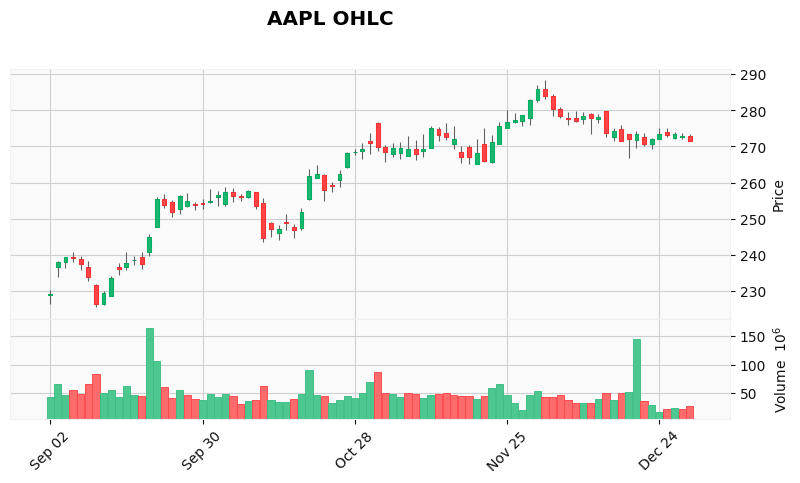

In [40]:
mpf.plot(
    ohlc,
    type="candle",   # oppure "ohlc" per barre OHLC
    volume=True,
    style="yahoo",
    title="AAPL OHLC",
    figsize=(10, 5)
)

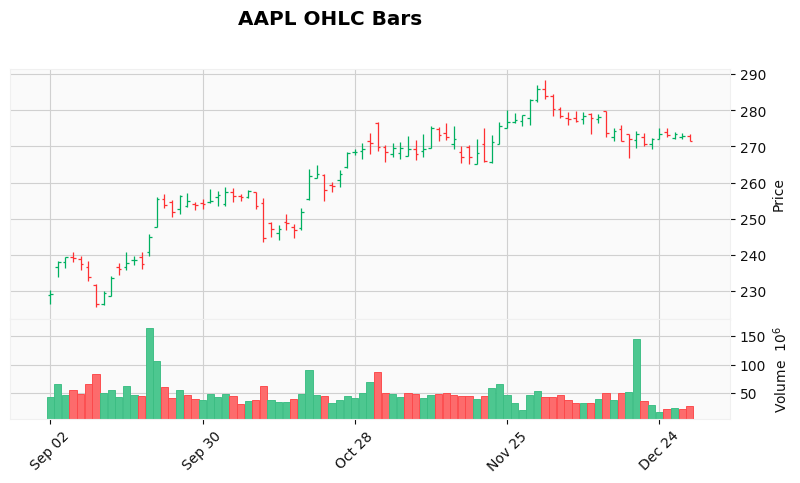

In [41]:
mpf.plot(ohlc, type="ohlc", volume=True, style="yahoo", title="AAPL OHLC Bars", figsize=(10,5))

**Multiple Tickers**

To fetch data for multiple stocks:

In [42]:
tickers = ["AAPL", "MSFT", "GOOGL"]
data = yf.download(tickers, start="2020-01-01", end="2023-12-31")
data.head()

[*********************100%***********************]  3 of 3 completed


Price           Close                              High             \
Ticker           AAPL      GOOGL        MSFT       AAPL      GOOGL   
Date                                                                 
2020-01-02  72.400513  67.920807  152.505676  72.460776  67.920807   
2020-01-03  71.696655  67.565491  150.606735  72.455974  68.172409   
2020-01-06  72.267937  69.366394  150.996017  72.306506  69.391700   
2020-01-07  71.928062  69.232391  149.619263  72.533103  69.648748   
2020-01-08  73.085098  69.725174  152.002457  73.386416  70.063120   

Price                         Low                              Open  \
Ticker            MSFT       AAPL      GOOGL        MSFT       AAPL   
Date                                                                  
2020-01-02  152.610120  71.156674  66.819630  150.331371  71.409778   
2020-01-03  151.869547  71.472477  66.860816  150.075028  71.629160   
2020-01-06  151.062488  70.568510  67.043446  148.603320  70.819208   
2020-01-07  151.603675  71.708703  69.056225  149.372403  72.277586   
2020-01-08  152.676595  71.631544  69.109328  149.970567  71.631544   

Price                                 Volume                      
Ticker          GOOGL        MSFT       AAPL     GOOGL      MSFT  
Date                                                              
2020-01-02  66.914911  150.758634  135480400  27278000  22622100  
2020-01-03  66.894565  150.321902  146322800  23408000  21116200  
2020-01-06  67.074704  149.144532  118387200  46768000  20813700  
2020-01-07  69.497887  151.271365  108872000  34330000  21634100  
2020-01-08  69.218004  150.901055  132079200  35314000  27746500

This returns a multi-index DataFrame where the first level of the index contains the tickers.

**Closing Prices**

To extract the closing prices for all tickers:

In [43]:
close_prices = data["Close"]
close_prices.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2020-01-02,72.400513,67.920807,152.505676
2020-01-03,71.696655,67.565491,150.606735
2020-01-06,72.267937,69.366394,150.996017
2020-01-07,71.928062,69.232391,149.619263
2020-01-08,73.085098,69.725174,152.002457


**Calculating Daily Returns**

In [44]:
#daily_returns = apple_data["Adj Close"].pct_change()
daily_returns = apple_data["Close"].pct_change()
daily_returns.head()

Date
2025-09-02         NaN
2025-09-03    0.038090
2025-09-04    0.005493
2025-09-05   -0.000375
2025-09-08   -0.007551
Name: Close, dtype: float64

**Resampling Data**

Resample the data to a monthly and weekly frequency:

In [45]:
monthly_data = apple_data.resample("M").mean()
monthly_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-09-30,242.024884,243.804352,239.456447,241.443613,6.026364e+07
2025-10-31,257.803838,260.265237,255.361969,258.020380,4.770183e+07
2025-11-30,271.333742,274.192021,268.786738,270.493595,4.618833e+07
2025-12-31,276.048058,278.053911,273.992712,276.350051,4.202404e+07


In [46]:
monthly_data = apple_data.resample("W").mean()
monthly_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-09-07,236.464294,237.277746,233.694576,235.778102,53230800.0
2025-09-14,232.181458,234.814433,229.825944,232.474898,60957400.0
2025-09-21,238.988483,240.942759,236.736775,238.415573,72123900.0
2025-09-28,254.544824,256.409282,251.167265,252.860044,61874940.0
2025-10-05,255.445117,256.936275,253.347114,254.656618,43666340.0


**Plotting Closing Prices**

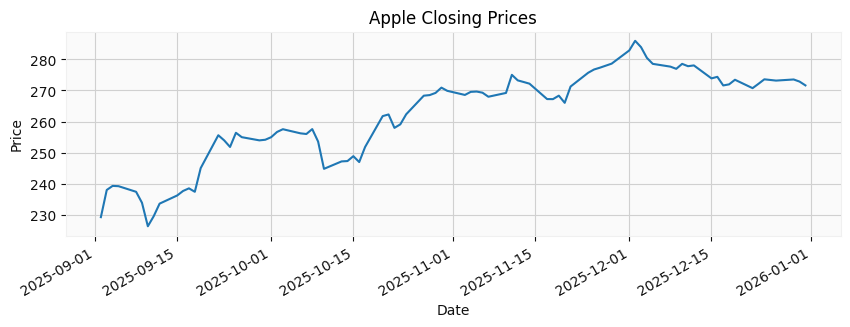

In [47]:
plt.figure(figsize=(10,3))
apple_data["Close"].plot(title="Apple Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

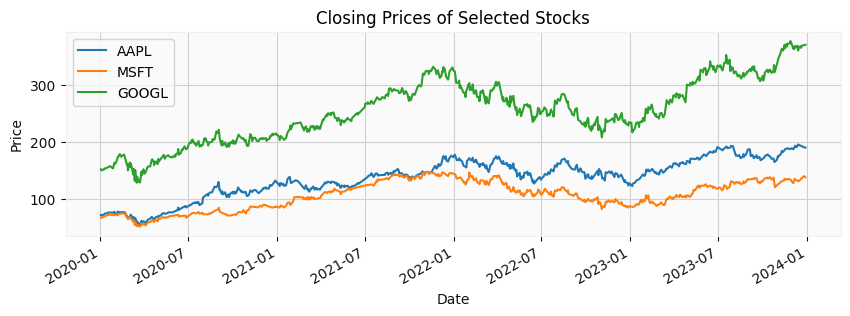

In [48]:
close_prices.plot(title="Closing Prices of Selected Stocks",figsize=(10,3))
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(tickers)
plt.show()

### Working with Company Financials

You can also access company financials such as income statements, balance sheets, and cash flows

In [49]:
apple = yf.Ticker("AAPL")

# Income Statement
print(apple.financials)

                                                      2025-09-30  \
Tax Effect Of Unusual Items                         0.000000e+00   
Tax Rate For Calcs                                  1.560000e-01   
Normalized EBITDA                                   1.447480e+11   
Net Income From Continuing Operation Net Minori...  1.120100e+11   
Reconciled Depreciation                             1.169800e+10   
Reconciled Cost Of Revenue                          2.209600e+11   
EBITDA                                              1.447480e+11   
EBIT                                                1.330500e+11   
Net Interest Income                                          NaN   
Interest Expense                                             NaN   
Interest Income                                              NaN   
Normalized Income                                   1.120100e+11   
Net Income From Continuing And Discontinued Ope...  1.120100e+11   
Total Expenses                                  

In [50]:
# Balance Sheet
print(apple.balance_sheet)

                                                    2025-09-30    2024-09-30  \
Treasury Shares Number                                     NaN           NaN   
Ordinary Shares Number                            1.477326e+10  1.511679e+10   
Share Issued                                      1.477326e+10  1.511679e+10   
Net Debt                                          6.272300e+10  7.668600e+10   
Total Debt                                        9.865700e+10  1.066290e+11   
...                                                        ...           ...   
Cash Cash Equivalents And Short Term Investments  5.469700e+10  6.517100e+10   
Other Short Term Investments                      1.876300e+10  3.522800e+10   
Cash And Cash Equivalents                         3.593400e+10  2.994300e+10   
Cash Equivalents                                  7.667000e+09  2.744000e+09   
Cash Financial                                    2.826700e+10  2.719900e+10   

                                       

In [51]:
# Cash Flow
print(apple.cashflow)

                                                  2025-09-30    2024-09-30  \
Free Cash Flow                                  9.876700e+10  1.088070e+11   
Repurchase Of Capital Stock                    -9.071100e+10 -9.494900e+10   
Repayment Of Debt                              -1.093200e+10 -9.958000e+09   
Issuance Of Debt                                4.481000e+09  0.000000e+00   
Issuance Of Capital Stock                                NaN           NaN   
Capital Expenditure                            -1.271500e+10 -9.447000e+09   
Interest Paid Supplemental Data                          NaN           NaN   
Income Tax Paid Supplemental Data               4.336900e+10  2.610200e+10   
End Cash Position                               3.593400e+10  2.994300e+10   
Beginning Cash Position                         2.994300e+10  3.073700e+10   
Changes In Cash                                 5.991000e+09 -7.940000e+08   
Financing Cash Flow                            -1.206860e+11 -1.

### Market Indices

Here are the Yahoo Finance ticker symbols for the some financial indices:

<table border="1" style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="text-align: left;">Index Name</th>
      <th style="text-align: left;">Ticker Symbol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left;">NASDAQ 100 - PRICE INDEX</td>
      <td style="text-align: left;">^NDX</td>
    </tr>
    <tr>
      <td style="text-align: left;">NASDAQ COMPOSITE - PRICE INDEX</td>
      <td style="text-align: left;">^IXIC</td>
    </tr>
    <tr>
      <td style="text-align: left;">S&P 500 COMPOSITE - PRICE INDEX</td>
      <td style="text-align: left;">^GSPC</td>
    </tr>
  </tbody>
</table>

          
Please note that Yahoo Finance uses specific ticker symbols for indices, often prefixed with a caret (^). These symbols are case-sensitive and should be entered exactly as shown.

In [52]:
tickers = ["^NDX", "^IXIC", "^GSPC"]
index = yf.download(tickers, start="2014-01-01", end="2022-12-31")
index.head()

[*********************100%***********************]  3 of 3 completed


Price             Close                                   High               \
Ticker            ^GSPC        ^IXIC         ^NDX        ^GSPC        ^IXIC   
Date                                                                          
2014-01-02  1831.979980  4143.069824  3563.570068  1845.859985  4160.959961   
2014-01-03  1831.369995  4131.910156  3538.729980  1838.239990  4152.959961   
2014-01-06  1826.770020  4113.680176  3526.959961  1837.160034  4139.779785   
2014-01-07  1837.880005  4153.180176  3557.850098  1840.099976  4158.180176   
2014-01-08  1837.489990  4165.609863  3567.540039  1840.020020  4171.750000   

Price                            Low                                   Open  \
Ticker             ^NDX        ^GSPC        ^IXIC         ^NDX        ^GSPC   
Date                                                                          
2014-01-02  3577.030029  1827.739990  4131.790039  3553.649902  1845.859985   
2014-01-03  3567.510010  1829.130005  4124.959961  3537.610107  1833.209961   
2014-01-06  3542.520020  1823.729980  4103.750000  3512.449951  1832.310059   
2014-01-07  3562.989990  1828.709961  4126.479980  3535.500000  1828.709961   
2014-01-08  3575.149902  1831.400024  4145.000000  3551.120117  1837.900024   

Price                                     Volume                          
Ticker            ^IXIC         ^NDX       ^GSPC       ^IXIC        ^NDX  
Date                                                                      
2014-01-02  4160.029785  3575.600098  3080600000  1738820000  1738820000  
2014-01-03  4148.560059  3564.939941  2774270000  1667480000  1667480000  
2014-01-06  4137.029785  3539.020020  3294850000  2292840000  2292840000  
2014-01-07  4128.569824  3539.290039  3511750000  2278220000  2278220000  
2014-01-08  4154.279785  3558.300049  3652140000  2345220000  2345220000

**Save to CSV**

In [73]:
import os

path_name = '.'
file_name = 'index_data.csv'
file_name = os.path.join(path_name, file_name)
index.to_csv(file_name)

print(f"File saved to {file_name}")

File saved to .\index_data.csv


**Other Examples**

Other very simple examples include Stock Price Correlation Analysis and Portfolio Performance

In [74]:
returns = close_prices.pct_change()
correlation = returns.corr()
print(correlation)

Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    1.000000  0.691375  0.777003
GOOGL   0.691375  1.000000  0.772643
MSFT    0.777003  0.772643  1.000000


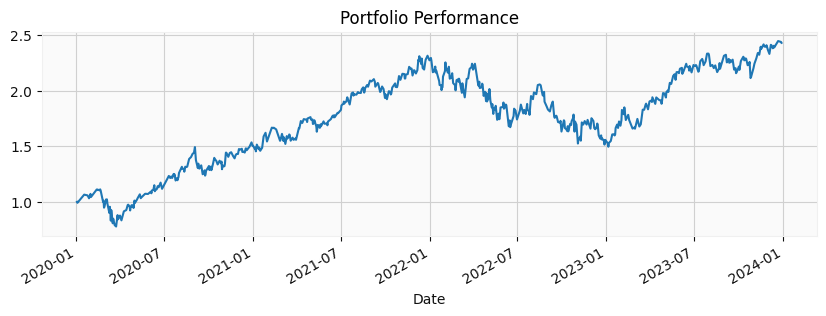

In [75]:
weights = [0.4, 0.4, 0.2]  # Allocation weights for AAPL, MSFT, GOOGL
portfolio_returns = (returns * weights).sum(axis=1)
portfolio_cumulative = (1 + portfolio_returns).cumprod()
portfolio_cumulative.plot(title="Portfolio Performance", figsize=(10,3))
plt.show()

### Forex

In [76]:
import yfinance as yf
import matplotlib.pyplot as plt

In [77]:
# Define major Forex pairs
forex_pairs = ["EURUSD=X", "GBPUSD=X", "AUDUSD=X", "USDCAD=X"]

# Download last 1 year of Forex data
forex_data = yf.download(forex_pairs, period="1y", interval="1d")

# Extract closing prices
forex_closing_prices = forex_data['Close']

[*********************100%***********************]  4 of 4 completed


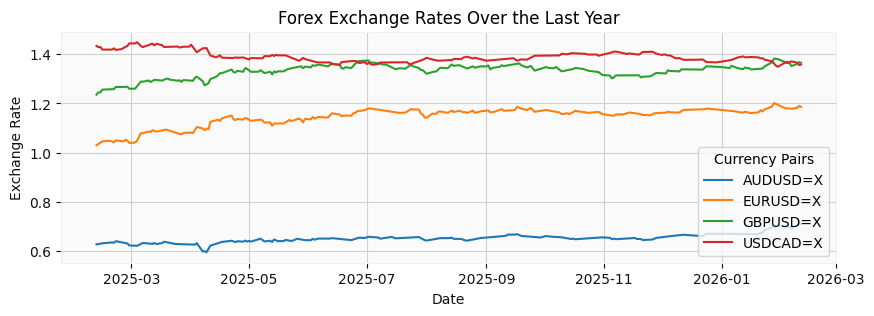

In [78]:
# Plot Forex exchange rates over time
plt.figure(figsize=(10, 3))
for pair in forex_closing_prices.columns:
    plt.plot(forex_closing_prices.index, forex_closing_prices[pair], label=pair)
# Formatting the plot
plt.title("Forex Exchange Rates Over the Last Year")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend(title="Currency Pairs")
plt.grid(True)
# Show the plot
plt.show()

### Options

Yahoo Finance also provides financial option data, which can be accessed programmatically using the `yfinance` library. Below is a step-by-step guide on how to download and analyze option data from Yahoo Finance.

**Access Option Chains**

Each stock has a set of options available for different expiration dates. You can fetch these option chains using the `Ticker` object in `yfinance`. This will return a list of all available expiration dates for the options.

In [79]:
#
# Fetching Option Expiration Dates
#
ticker = yf.Ticker("AAPL")  # Replace "AAPL" with your desired stock ticker
expiration_dates = ticker.options
print(expiration_dates)

('2026-02-11', '2026-02-13', '2026-02-18', '2026-02-20', '2026-02-27', '2026-03-06', '2026-03-13', '2026-03-20', '2026-03-27', '2026-04-17', '2026-05-15', '2026-06-18', '2026-07-17', '2026-08-21', '2026-09-18', '2026-11-20', '2026-12-18', '2027-01-15', '2027-06-17', '2027-12-17', '2028-01-21', '2028-03-17', '2028-12-15')


**Download Option Data for a Specific Expiration Date**

Once you have the expiration dates, you can fetch the options data (both calls and puts) for a specific expiration date. The data for calls and puts will be returned as pandas DataFrames, containing columns such as:
<pre>
- <strong>contractSymbol</strong>: The option symbol.
- <strong>strike</strong>        : The strike price.
- <strong>lastPrice</strong>     : The last traded price of the option.
- <strong>bid</strong>           : The bid price.
- <strong>ask</strong>           : The ask price.
- <strong>volume</strong>        : The trading volume.
- <strong>openInterest</strong>  : The number of open contracts.
</pre>

In [80]:
#
# Fetching Option Chains (Calls and Puts)
#
# Specify the expiration date
expiration_date = expiration_dates[0]  # Example: Use the first available date

# Fetch options data
options_data = ticker.option_chain(expiration_date)

# Separate calls and puts data
calls = options_data.calls
puts = options_data.puts

In [81]:
# Display the data
print("Calls:\n")
calls.head()

Calls:



,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL260211C00185000,2026-01-30 15:12:47+00:00,185.0,72.25,0.0,0.0,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD
1,AAPL260211C00205000,2026-02-06 18:41:39+00:00,205.0,72.32,0.0,0.0,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD
2,AAPL260211C00210000,2026-02-05 18:08:03+00:00,210.0,64.75,0.0,0.0,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD
3,AAPL260211C00225000,2026-02-10 20:33:05+00:00,225.0,49.08,0.0,0.0,0.0,0.0,1.0,2,0.00001,True,REGULAR,USD
4,AAPL260211C00230000,2026-02-06 14:30:05+00:00,230.0,47.90,0.0,0.0,0.0,0.0,6.0,1,0.00001,True,REGULAR,USD


In [82]:
print("Puts:\n")
puts.head()

Puts:



,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL260211P00180000,2026-02-09 15:35:14+00:00,180.0,0.02,0.0,0.0,0.0,0.0,347.0,847,0.500005,False,REGULAR,USD
1,AAPL260211P00185000,2026-02-09 15:35:14+00:00,185.0,0.07,0.0,0.0,0.0,0.0,347.0,352,0.500005,False,REGULAR,USD
2,AAPL260211P00190000,2026-02-09 16:42:29+00:00,190.0,0.25,0.0,0.0,0.0,0.0,298.0,300,0.500005,False,REGULAR,USD
3,AAPL260211P00195000,2026-02-09 16:42:29+00:00,195.0,0.30,0.0,0.0,0.0,0.0,298.0,299,0.500005,False,REGULAR,USD
4,AAPL260211P00200000,2026-02-03 17:28:25+00:00,200.0,0.02,0.0,0.0,0.0,0.0,20.0,19,0.500005,False,REGULAR,USD


**Analyze Option Data**

You can process and analyze the data to gain insights.

Example: ***Filter Options Based on Strike Price***

In [83]:
# Filter calls with a strike price greater than 150
filtered_calls = calls[calls['strike'] > 150]
filtered_calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL260211C00185000,2026-01-30 15:12:47+00:00,185.0,72.25,0.0,0.0,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD
1,AAPL260211C00205000,2026-02-06 18:41:39+00:00,205.0,72.32,0.0,0.0,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD
2,AAPL260211C00210000,2026-02-05 18:08:03+00:00,210.0,64.75,0.0,0.0,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD
3,AAPL260211C00225000,2026-02-10 20:33:05+00:00,225.0,49.08,0.0,0.0,0.0,0.0,1.0,2,0.00001,True,REGULAR,USD
4,AAPL260211C00230000,2026-02-06 14:30:05+00:00,230.0,47.90,0.0,0.0,0.0,0.0,6.0,1,0.00001,True,REGULAR,USD


Example: ***Sort Options by Open Interest***

In [84]:
# Sort puts by open interest in descending order
sorted_puts = puts.sort_values(by='openInterest', ascending=False)
sorted_puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
29,AAPL260211P00272500,2026-02-10 20:59:58+00:00,272.5,1.04,0.0,0.0,0.0,0.0,17428.0,9817,0.062509,False,REGULAR,USD
28,AAPL260211P00270000,2026-02-10 20:59:59+00:00,270.0,0.38,0.0,0.0,0.0,0.0,13425.0,4603,0.125009,False,REGULAR,USD
27,AAPL260211P00267500,2026-02-10 20:59:59+00:00,267.5,0.15,0.0,0.0,0.0,0.0,3850.0,2060,0.125009,False,REGULAR,USD
26,AAPL260211P00265000,2026-02-10 20:59:31+00:00,265.0,0.07,0.0,0.0,0.0,0.0,1536.0,1625,0.250007,False,REGULAR,USD
30,AAPL260211P00275000,2026-02-10 20:59:56+00:00,275.0,2.23,0.0,0.0,0.0,0.0,8524.0,1177,0.031260,False,REGULAR,USD


Example: **Merge Calls and Puts**

In [85]:
# Add a column to distinguish between calls and puts
calls['type'] = 'Call'
puts['type'] = 'Put'

# Merge calls and puts
merged_options = pd.concat([calls, puts])
merged_options.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type
0,AAPL260211C00185000,2026-01-30 15:12:47+00:00,185.0,72.25,0.0,0.0,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD,Call
1,AAPL260211C00205000,2026-02-06 18:41:39+00:00,205.0,72.32,0.0,0.0,0.0,0.0,1.0,0,0.00001,True,REGULAR,USD,Call
2,AAPL260211C00210000,2026-02-05 18:08:03+00:00,210.0,64.75,0.0,0.0,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD,Call
3,AAPL260211C00225000,2026-02-10 20:33:05+00:00,225.0,49.08,0.0,0.0,0.0,0.0,1.0,2,0.00001,True,REGULAR,USD,Call
4,AAPL260211C00230000,2026-02-06 14:30:05+00:00,230.0,47.90,0.0,0.0,0.0,0.0,6.0,1,0.00001,True,REGULAR,USD,Call


**Save Option Data to CSV**

You can save the fetched option data to a CSV file for further analysis:

In [86]:
# Save calls and puts to separate CSV files
calls.to_csv("./calls_data.csv", index=False)
puts.to_csv("./puts_data.csv", index=False)

**Automate the Process for All Expiration Dates**

If you want to fetch options data for all expiration dates...

In [87]:
# Initialize empty lists to store call and put option data
all_calls = []
all_puts = []
# Iterate over each expiration date in the list
for date in expiration_dates:
    # Retrieve the option chain data for the given expiration date
    options = ticker.option_chain(date)
    # Extract call and put options separately
    calls, puts = options.calls, options.puts
    # Add a new column to each DataFrame to store the expiration date
    calls['expirationDate'] = date
    puts['expirationDate'] = date
    # Append the modified DataFrames to the respective lists
    all_calls.append(calls)
    all_puts.append(puts)
# Combine all collected call options into a single DataFrame
all_calls_data = pd.concat(all_calls)
# Combine all collected put options into a single DataFrame
all_puts_data = pd.concat(all_puts)
# Save the combined call options data to a CSV file
all_calls_data.to_csv("all_calls_data.csv", index=False)
# Save the combined put options data to a CSV file
all_puts_data.to_csv("all_puts_data.csv", index=False)

<div class="alert alert-warning" style="background-color: #FFD700; color: black;">
    <strong>Limitations</strong>

yfinance does not provide historical options data; you can only access current data for the available expiration dates.
</div>


### Crypto

The code below, retrieves historical price data for Bitcoin from Yahoo Finance over a specified time period, from January 2020 to January 2024. The data are stored in a pandas DataFrame containing daily market information such as opening price, high, low, close, adjusted close, and trading volume. The first command displays the initial rows of the dataset to provide a quick visual check of the data structure, while the final command prints a summary of the dataset, including column types, number of observations, and the presence of any missing values. Together, these steps allow for an initial inspection and validation of the downloaded financial time series before further analysis.

The dataset btc in output, contains daily historical price data for Bitcoin quoted in U.S. dollars. Each observation represents the **market value of one Bitcoin expressed in USD** and includes the opening, highest, lowest, and closing prices for the day, along with the traded volume. The time index is daily and continuous, reflecting the fact that Bitcoin trades without interruption. The data report **price levels rather than percentage changes**, so any analysis of returns or growth rates must be derived separately from the price series.

In [88]:
# Download Bitcoin data
btc = yf.download('BTC-USD', 
                  start='2020-01-01', 
                  end='2024-01-01')

# Display first few rows
print(btc.head())

# Basic information
print(btc.info())

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2020-01-01 to 2023-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   1461 non-null   float64
 1   (High, BTC-USD)    1461 non-null   float64
 2   (Low, BTC-USD)     1461 non-null   float64
 3   (Open, BTC-USD)    1461

This code downloads daily historical price data for multiple cryptocurrencies quoted in U.S. dollars over a fixed time window. The data are retrieved simultaneously for Bitcoin, Ethereum, and Binance Coin and stored in a single pandas DataFrame with a hierarchical column structure that separates price fields from ticker symbols. From this combined dataset, it is possible to extract individual series, such as the closing price of Bitcoin, for focused analysis. The code also shows an alternative approach in which each cryptocurrency is downloaded separately and stored in a dictionary, producing independent datasets that may be more convenient for asset-specific processing or comparisons across markets.

In [89]:
# List of tickers
tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD']

# Download data
data = yf.download(tickers, 
                   start='2020-01-01', 
                   end='2024-01-01')

# Access specific cryptocurrency
btc_close = data['Close']['BTC-USD']

# Or download separately
crypto_dict = {}
for ticker in tickers:
    crypto_dict[ticker] = yf.download(ticker, 
                                       start='2020-01-01',
                                       end='2024-01-01')


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


This code downloads daily price data for a selected set of cryptocurrencies over a common time horizon and processes each dataset individually. For every asset, it computes simple returns and logarithmic returns based on closing prices, transforming the original price series into measures of relative price changes. It then estimates short-term market variability by calculating a rolling volatility over a 30-day window using daily returns. The resulting enriched datasets, containing prices, returns, and volatility measures, are stored separately in a dictionary, allowing consistent analysis and comparison across different cryptocurrencies.

In [90]:
import yfinance as yf
import numpy as np

# Define the list of cryptocurrencies to be downloaded.
# Each ticker represents the price of the cryptocurrency quoted in U.S. dollars.
crypto_list = ['BTC-USD', 'ETH-USD', 'BNB-USD']

# Define the common time window for all assets.
# Using the same start and end dates ensures temporal comparability.
start_date = '2020-01-01'
end_date = '2024-01-01'

# Initialize an empty dictionary that will store one DataFrame per cryptocurrency.
# Each key will be the ticker symbol, and each value will be the corresponding dataset.
data = {}

# Loop over each cryptocurrency in the list.
for crypto in crypto_list:
    
    # Download daily historical price data for the current cryptocurrency.
    # The resulting DataFrame contains Open, High, Low, Close, and Volume.
    df = yf.download(
        crypto,
        start=start_date,
        end=end_date,
        progress=False
    )
    
    # Compute simple (percentage) returns based on daily closing prices.
    # This measures the relative day-to-day price change.
    df['Returns'] = df['Close'].pct_change()
    
    # Compute logarithmic returns using closing prices.
    # Log returns are additive over time and commonly used in financial modeling.
    df['Log_Returns'] = np.log(
        df['Close'] / df['Close'].shift(1)
    )
    
    # Estimate short-term volatility using a rolling window.
    # The 30-day rolling standard deviation of daily returns
    # provides a measure of monthly price variability.
    df['Volatility'] = df['Returns'].rolling(
        window=30
    ).std()
    
    # Store the enriched DataFrame in the dictionary,
    # using the ticker symbol as the key.
    data[crypto] = df

In [91]:
df.head()

Price,Close,High,Low,Open,Volume,Returns,Log_Returns,Volatility
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD,,,
Date,,,,,,,,
2020-01-01,13.689083,13.873946,13.654942,13.730962,172980718,NaN,NaN,NaN
2020-01-02,13.027011,13.715548,12.989974,13.698126,156376427,-0.048365,-0.049574,NaN
2020-01-03,13.660452,13.763709,13.012638,13.035329,173683857,0.048625,0.047480,NaN
2020-01-04,13.891512,13.921914,13.560008,13.667442,182230374,0.016915,0.016773,NaN
2020-01-05,14.111019,14.410801,13.886547,13.888340,202552703,0.015802,0.015678,NaN


This code performs feature engineering on Bitcoin price data in preparation for further analysis or modeling. It starts by isolating the Bitcoin dataset from a larger collection and creating a working copy. It then adds technical indicators commonly used in financial analysis, including short- and medium-term moving averages based on closing prices and a simplified version of the Relative Strength Index to capture recent price momentum. To incorporate information from the recent past, the code creates lagged versions of returns and trading volume, allowing the model to account for short-term temporal dependencies. Finally, all rows containing missing values introduced by rolling calculations and time shifts are removed, leaving a clean dataset of engineered features ready for statistical analysis or machine-learning applications.

> **The Relative Strength Index (RSI)** is a momentum indicator used in technical analysis to measure the speed and magnitude of recent price movements. It is computed by comparing the average size of gains and losses over a given time window, typically 14 periods, and it takes values between 0 and 100. High values indicate strong upward momentum, while low values reflect persistent downward pressure, making the RSI a useful tool for assessing overbought and oversold market conditions.


In [92]:
# Extract the Bitcoin dataset from the dictionary and create a copy.
# Using .copy() avoids unintended modifications to the original data.
btc = data['BTC-USD'].copy()

# ------------------------------------------------------------
# Moving averages
# ------------------------------------------------------------

# Compute the 20-day simple moving average of the closing price.
# This captures short-term price trends.
btc['SMA_20'] = btc['Close'].rolling(window=20).mean()

# Compute the 50-day simple moving average of the closing price.
# This captures medium-term price trends.
btc['SMA_50'] = btc['Close'].rolling(window=50).mean()

# ------------------------------------------------------------
# Relative Strength Index (RSI) - simplified implementation
# ------------------------------------------------------------

# Compute daily price changes (difference in closing prices).
delta = btc['Close'].diff()

# Isolate positive price changes and compute their 14-day rolling average.
# Negative changes are replaced with zero.
gain = delta.where(delta > 0, 0).rolling(window=14).mean()

# Isolate negative price changes (in absolute value) and compute
# their 14-day rolling average.
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

# Compute the relative strength as the ratio of average gains to average losses.
rs = gain / loss

# Convert relative strength into the RSI indicator.
# RSI ranges between 0 and 100 and measures price momentum.
btc['RSI'] = 100 - (100 / (1 + rs))

# ------------------------------------------------------------
# Lagged features
# ------------------------------------------------------------

# Create lagged versions of returns and volume for the past 1 to 5 days.
# These features allow the model to capture short-term temporal dependence.
for i in range(1, 6):
    btc[f'Returns_lag_{i}'] = btc['Returns'].shift(i)
    btc[f'Volume_lag_{i}'] = btc['Volume'].shift(i)

# ------------------------------------------------------------
# Final cleaning
# ------------------------------------------------------------

# Remove rows with missing values introduced by rolling windows and shifts.
# The resulting dataset is fully aligned and ready for analysis or modeling.
btc = btc.dropna()

In [93]:
btc.head()

Price,Close,High,Low,Open,Volume,Returns,Log_Returns,Volatility,SMA_20,SMA_50,...,Returns_lag_1,Volume_lag_1,Returns_lag_2,Volume_lag_2,Returns_lag_3,Volume_lag_3,Returns_lag_4,Volume_lag_4,Returns_lag_5,Volume_lag_5
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-19,9633.386719,10191.675781,9611.223633,10143.798828,46992019710,-0.050149,-0.051450,0.025430,9794.499902,8932.137070,...,0.046630,4.727102e+10,-0.024590,4.599830e+10,0.004551,4.337478e+10,-0.040990,4.386505e+10,0.009569,4.333826e+10
2020-02-20,9608.475586,9643.216797,9507.900391,9629.325195,44925260237,-0.002586,-0.002589,0.025427,9807.397217,8980.303096,...,-0.050149,4.699202e+10,0.046630,4.727102e+10,-0.024590,4.599830e+10,0.004551,4.337478e+10,-0.040990,4.386505e+10
2020-02-21,9686.441406,9723.014648,9589.743164,9611.782227,40930547513,0.008114,0.008082,0.025356,9822.075537,9034.322520,...,-0.002586,4.492526e+10,-0.050149,4.699202e+10,0.046630,4.727102e+10,-0.024590,4.599830e+10,0.004551,4.337478e+10
2020-02-22,9663.181641,9698.231445,9600.728516,9687.707031,35838025154,-0.002401,-0.002404,0.024489,9838.016357,9080.688467,...,0.008114,4.093055e+10,-0.002586,4.492526e+10,-0.050149,4.699202e+10,0.046630,4.727102e+10,-0.024590,4.599830e+10
2020-02-23,9924.515625,9937.404297,9657.791016,9663.318359,41185185761,0.027044,0.026685,0.024819,9869.566064,9130.965645,...,-0.002401,3.583803e+10,0.008114,4.093055e+10,-0.002586,4.492526e+10,-0.050149,4.699202e+10,0.046630,4.727102e+10


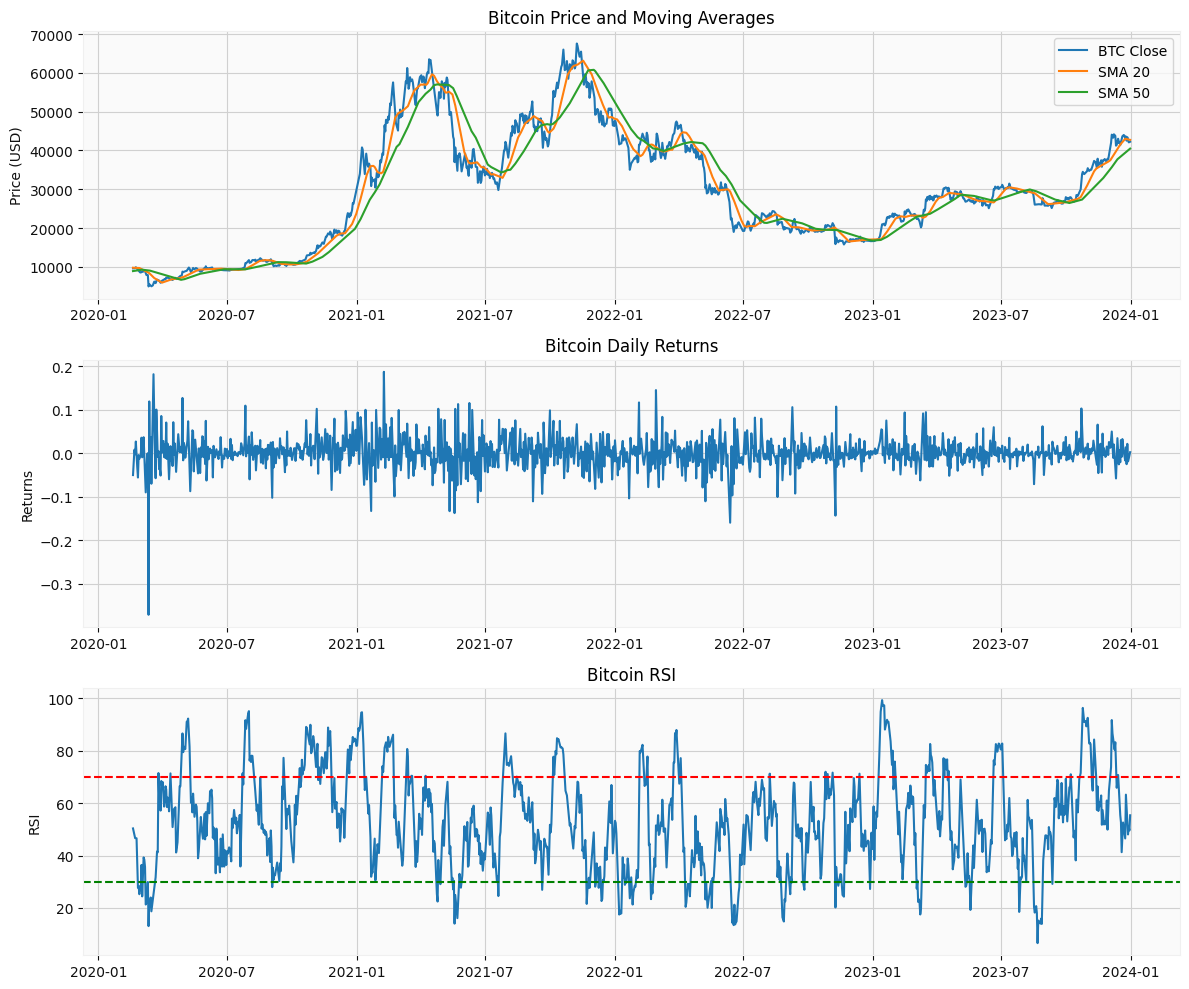

In [94]:
# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot prices
axes[0].plot(btc.index, btc['Close'], label='BTC Close')
axes[0].plot(btc.index, btc['SMA_20'], label='SMA 20')
axes[0].plot(btc.index, btc['SMA_50'], label='SMA 50')
axes[0].set_ylabel('Price (USD)')
axes[0].set_title('Bitcoin Price and Moving Averages')
axes[0].legend()
axes[0].grid(True)

# Plot returns
axes[1].plot(btc.index, btc['Returns'])
axes[1].set_ylabel('Returns')
axes[1].set_title('Bitcoin Daily Returns')
axes[1].grid(True)

# Plot RSI
axes[2].plot(btc.index, btc['RSI'])
axes[2].axhline(y=70, color='r', linestyle='--')
axes[2].axhline(y=30, color='g', linestyle='--')
axes[2].set_ylabel('RSI')
axes[2].set_title('Bitcoin RSI')
axes[2].grid(True)

plt.tight_layout()
plt.savefig('bitcoin_analysis.png', dpi=300)


Correlation Matrix:
          BTC-USD   ETH-USD   BNB-USD
BTC-USD  1.000000  0.820806  0.665714
ETH-USD  0.820806  1.000000  0.685813
BNB-USD  0.665714  0.685813  1.000000


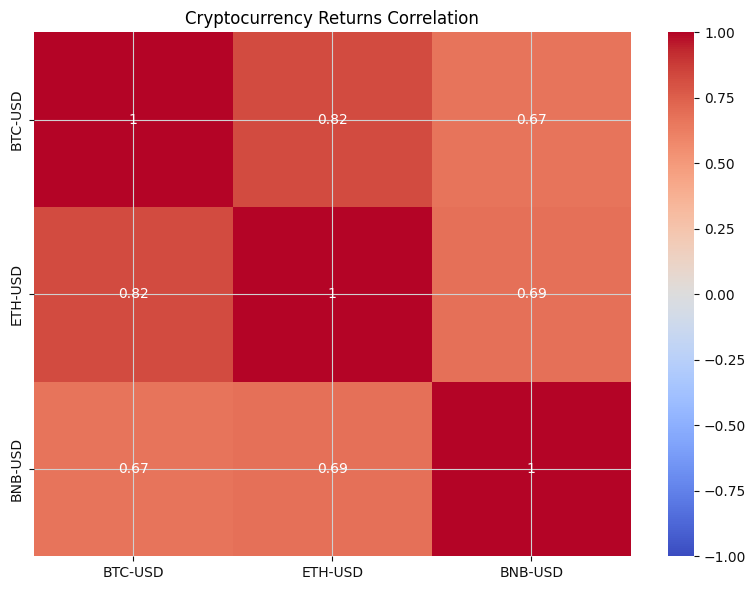

In [95]:
# Extract close prices for all cryptocurrencies
prices = pd.DataFrame()
for crypto in crypto_list:
    prices[crypto] = data[crypto]['Close']

# Compute returns
returns = prices.pct_change().dropna()

# Correlation matrix
correlation = returns.corr()
print("Correlation Matrix:")
print(correlation)

# Visualize correlation
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm',
            center=0, vmin=-1, vmax=1)
plt.title('Cryptocurrency Returns Correlation')
plt.tight_layout()
plt.savefig('crypto_correlation.png', dpi=300)


---

## Exercises

### Exercise — FRED macro series: merge and plot two indicators

**Problem**. Download the U.S. unemployment rate (UNRATE, monthly) and the CPI index (CPIAUCSL, monthly) from FRED for the period 2005–2025. Merge them into a single DataFrame, compute year-over-year CPI inflation (in percent), and produce a time-series plot showing unemployment and inflation on two different y-axes.

<details>
<summary><strong>Click to show solution</strong></summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

start = "2005-01-01"
end   = "2025-12-31"

unrate = pdr.get_data_fred("UNRATE", start=start, end=end)
cpi    = pdr.get_data_fred("CPIAUCSL", start=start, end=end)

df = unrate.join(cpi, how="inner")

# YoY inflation (%)
df["CPI_YoY"] = df["CPIAUCSL"].pct_change(12) * 100

# Plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(df.index, df["UNRATE"], label="UNRATE (%, monthly)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Unemployment rate (%)")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df.index, df["CPI_YoY"], label="CPI YoY inflation (%)")
ax2.set_ylabel("Inflation (YoY, %)")

plt.title("US Unemployment vs CPI Inflation (YoY)")
fig.tight_layout()
plt.show()
```    

### Exercise — Yield curve spreads: handle missing values and detect inversions

Problem (English). Download daily Treasury yields from FRED (DGS10, DGS2, DGS3MO) for 2010–2025. Forward-fill missing values, compute the spreads 10Y–2Y and 10Y–3M, then identify “persistent inversions” defined as periods where the spread stays below zero for at least 30 consecutive observations. Print the start/end dates of each inversion period and plot the 10Y–2Y spread with inversion periods highlighted.

<details>
<summary><strong>Click to show solution</strong></summary>

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

start = "2010-01-01"
end   = "2025-12-31"
series = ["DGS10", "DGS2", "DGS3MO"]

rates = pdr.get_data_fred(series, start=start, end=end)

# Forward-fill non-trading days / missing observations
rates = rates.ffill()

# Spreads
rates["SPREAD_10Y_2Y"] = rates["DGS10"] - rates["DGS2"]
rates["SPREAD_10Y_3M"] = rates["DGS10"] - rates["DGS3MO"]

def persistent_inversions(spread: pd.Series, min_len: int = 30):
    below = spread < 0
    groups = (below != below.shift(1)).cumsum()
    periods = []
    for g, block in spread.groupby(groups):
        is_below = below.loc[block.index[0]]
        if is_below and len(block) >= min_len:
            periods.append((block.index[0], block.index[-1]))
    return periods

inv_10y2y = persistent_inversions(rates["SPREAD_10Y_2Y"], min_len=30)

print("Persistent inversions (10Y–2Y, >=30 days):")
for s, e in inv_10y2y:
    print(f" - {s.date()} to {e.date()} ({(e - s).days + 1} calendar days)")

# Plot with highlighted inversions
plt.figure(figsize=(10, 4))
plt.plot(rates.index, rates["SPREAD_10Y_2Y"], label="10Y–2Y spread")
plt.axhline(0, linestyle="--", linewidth=1)

for s, e in inv_10y2y:
    plt.axvspan(s, e, alpha=0.2)

plt.title("US 10Y–2Y Treasury Spread with Persistent Inversions Highlighted")
plt.ylabel("Percentage points")
plt.grid(True)
plt.tight_layout()
plt.show()
   ```

## Appendix - Python syntax reminders

### What is a Lambda Function in Python?

A **lambda function** in Python is a **small, anonymous function** that is defined using the `lambda` keyword. Unlike regular functions (`def`), a lambda function **does not have a name** and is typically used for short, one-time operations.

**Syntax of a Lambda Function**

```python
lambda arguments: expression
```
- `lambda` → The keyword to define a lambda function.
- `arguments` → Inputs to the function (like parameters in `def` functions).
- `expression` → A single-line operation that **returns** a value automatically.

🛑 **Key Restrictions**:

- A lambda function **must have exactly one expression** (cannot contain multiple statements).

- It **returns the result automatically** (no need for `return`).

**Basic Example**

A lambda function to add two numbers:
```python
add = lambda x, y: x + y
print(add(3, 5))  # Output: 8
```
- `lambda x, y: x + y` → Defines a function that takes `x` and `y` and returns their sum.
- `add(3, 5)` → Calls the lambda function with `x=3` and `y=5`.

💡 **Equivalent Regular Function:**

```python
def add(x, y):
    return x + y
```

Lambdas are just a **shorter** way to write simple functions.

**Use Cases of Lambda Functions**

Lambdas are often used where short, quick functions are needed, such as:

**1. Using Lambda with `map()` (Apply Function to a List)**

```python
numbers = [1, 2, 3, 4]
squared = list(map(lambda x: x ** 2, numbers))
print(squared)  # Output: [1, 4, 9, 16]
```
- `map()` applies the lambda function (`x ** 2`) to **each element** in `numbers`.

**2. Using Lambda with `filter()` (Filter Elements in a List)**

```python
numbers = [10, 15, 20, 25, 30]
filtered = list(filter(lambda x: x > 15, numbers))
print(filtered)  # Output: [20, 25, 30]
```
- `filter()` keeps only the values **greater than 15**.

**3. Using Lambda with `sorted()` (Custom Sorting)**

```python
names = ["Charlie", "Alice", "Bob"]
sorted_names = sorted(names, key=lambda name: len(name))
print(sorted_names)  # Output: ['Bob', 'Alice', 'Charlie']
```
- `sorted()` sorts by **string length** using the lambda function.

**4. Using Lambda in `reduce()` (Accumulate a Value)**

```python
from functools import reduce
numbers = [1, 2, 3, 4]
product = reduce(lambda x, y: x * y, numbers)
print(product)  # Output: 24
```
- `reduce()` applies the lambda **cumulatively**:  
  `((1*2) * 3) * 4 = 24`.

**Key Differences Between `lambda` and `def`**

| Feature             | `lambda` Function       | `def` Function           |
|---------------------|------------------------|--------------------------|
| **Definition**      | Uses `lambda` keyword   | Uses `def` keyword       |
| **Name**           | Anonymous (nameless)    | Requires a function name |
| **Number of Expressions** | Only one          | Multiple statements allowed |
| **Return Keyword** | Implicit return         | Requires `return` keyword |
| **Best Used For**  | Short, simple functions | Complex logic & multi-line code |

**When to Use Lambda Functions**

✅ **Use `lambda` for short, one-time use functions** (e.g., inside `map()`, `filter()`, `sorted()`).  

✅ **Use `def` for complex functions** requiring multiple lines or readability.

🚀 **Conclusion**: Lambda functions are **concise**, but should be used **wisely** when clarity is not compromised!

### What is an f-string in Python?

An **f-string** (formatted string literal) is a way to embed expressions inside string literals using curly braces `{}`. It was introduced in **Python 3.6** and provides a concise, readable, and efficient way to format strings.

**Syntax of f-strings**

An f-string is prefixed with `f` (or `F`), and variables or expressions are placed inside `{}`:

```python
name = "Alice"
age = 30
formatted_string = f"My name is {name} and I am {age} years old."
print(formatted_string)
```

**Output:**
```
My name is Alice and I am 30 years old.
```

**Key Features of f-strings**

1. **Variable Interpolation**  
   Directly insert variables into strings:
   ```python
   x = 5
   y = 10
   print(f"The sum of {x} and {y} is {x + y}.")
   ```
   **Output:**  
   ```
   The sum of 5 and 10 is 15.
   ```

2. **Expression Evaluation**  
   You can use **any valid Python expression** inside `{}`:
   ```python
   print(f"The square of 4 is {4**2}.")
   ```
   **Output:**  
   ```
   The square of 4 is 16.
   ```

3. **Formatting Numbers**  
   Use format specifiers like `.2f` (two decimal places), `,` (thousands separator), etc.:
   ```python
   pi = 3.14159
   print(f"Pi rounded to 2 decimal places: {pi:.2f}")
   print(f"Large number with commas: {1000000:,}")
   ```
   **Output:**  
   ```
   Pi rounded to 2 decimal places: 3.14
   Large number with commas: 1,000,000
   ```

4. **Padding & Alignment**  
   Align text and numbers:
   ```python
   print(f"{'Left':<10} | {'Center':^10} | {'Right':>10}")
   ```
   **Output:**  
   ```
   Left       |   Center   |      Right
   ```

5. **Calling Functions Inside f-strings**  
   ```python
   def greet(name):
       return f"Hello, {name}!"

   print(f"{greet('Bob')}")
   ```
   **Output:**  
   ```
   Hello, Bob!
   ```

**Comparison with Other Formatting Methods**

| **Method**             | **Example**                                  | **Output**              |
|------------------------|---------------------------------------------|-------------------------|
| **f-string (Python 3.6+)** | `f"Hello, {name}!"`                        | `Hello, Alice!`        |
| **`format()` method**  | `"Hello, {}!".format(name)`                 | `Hello, Alice!`        |
| **Old `%` formatting** | `"Hello, %s!" % name`                       | `Hello, Alice!`        |

🔹 **f-strings are faster and more readable** than `.format()` and `%` formatting.

**Conclusion**

✅ **f-strings** make string formatting **simpler, more readable, and more powerful**.  

✅ They **support expressions, number formatting, and function calls**.  

✅ They are the **recommended** way to format strings in modern Python (≥3.6). 🚀

### What is the Meaning of the Format in the World Bank Example

The lambda function in the code:
```python
lambda x: f"{x:,.0f}"
```
is using **Python’s formatted string literals (f-strings)** along with **format specifiers** to format the GDP values by inserting a **comma (`,`) every three digits**.

**Breaking Down the Format Specifier `{x:,.0f}`**

The format specifier inside the **f-string** (`f""`) follows this structure:

- `{x:,.0f}`
  - `:` → Starts the format specifier.
  - `,` → Adds a **thousands separator** (inserting commas every three digits).
  - `.0f` → Formats the number as a **floating-point number with zero decimal places** (`.0` means no decimals, `f` stands for fixed-point notation).

**How the Formatting Works**

Consider an example where `x = 21000000000000`:

```python
x = 21000000000000
formatted_x = f"{x:,.0f}"
print(formatted_x)
```

**Output:**
```
21,000,000,000,000
```

- The comma `,` ensures that **every three digits** from the right are grouped together.
- `.0f` removes any decimal places, converting it to an **integer-like format**.

**More Examples**

| **Number**         | **Formatted Output (`{x:,.0f}`)** |
|--------------------|----------------------------------|
| `1234567.89`      | `1,234,568` (Rounded to zero decimals) |
| `987654321`       | `987,654,321` |
| `15000.75`        | `15,001` (Rounded) |
| `99999999999`     | `99,999,999,999` |

If we wanted **two decimal places**, we could use `{x:,.2f}`:
```python
x = 1234567.891
formatted_x = f"{x:,.2f}"
print(formatted_x)
```

**Output:**
```
1,234,567.89
```
Here, `.2f` keeps **two decimal places**.


**Conclusion**

- The lambda function applies `f"{x:,.0f}"` to each GDP value.
- The `,` ensures **thousands separators**.
- The `.0f` ensures **no decimal places**.
- The result is a **human-friendly GDP format**, making large numbers **easier to read**. 🚀

### How use the `diff` method in `pandas`

**Understanding the Pandas Instruction:**

```python
vix = vix.diff(periods=1, axis=0)
```

This line **computes the difference between consecutive rows** in a Pandas DataFrame or Series named `vix`.

**Breaking Down the Parameters**

1. **`.diff(periods=1, axis=0)`**

- `periods=1` → Computes the difference between each value and the value **one row before**.

- `axis=0` → Operates **row-wise** (default), meaning it subtracts the previous row from the current row.


**Example 1: Using `.diff()` on a Pandas Series**

**Original VIX Series:**

```python
import pandas as pd

data = {'VIX': [15.2, 16.8, 18.1, 17.5, 19.0]}
vix = pd.DataFrame(data)

print(vix)
```
**Output:**
```
    VIX
0  15.2
1  16.8
2  18.1
3  17.5
4  19.0
```

**Applying `.diff(periods=1, axis=0)`:**

```python
vix = vix.diff(periods=1, axis=0)
print(vix)
```
**Output:**
```
    VIX
0   NaN   # First row has no previous value, so it's NaN
1   1.6   # 16.8 - 15.2
2   1.3   # 18.1 - 16.8
3  -0.6   # 17.5 - 18.1
4   1.5   # 19.0 - 17.5
```

**Example 2: Using `.diff()` on a DataFrame with Multiple Columns**

If `vix` is a DataFrame with multiple columns:

```python
data = {
    'VIX': [15.2, 16.8, 18.1, 17.5, 19.0],
    'SP500': [4500, 4520, 4535, 4510, 4540]
}
vix = pd.DataFrame(data)

# Compute row-wise differences
vix_diff = vix.diff(periods=1, axis=0)

print(vix_diff)
```
**Output:**
```
    VIX  SP500
0   NaN    NaN
1   1.6   20.0
2   1.3   15.0
3  -0.6  -25.0
4   1.5   30.0
```
Each column is processed **independently**.


**Key Takeaways**

- `.diff(periods=1, axis=0)` computes **row-wise differences**.

- **First row always returns `NaN`**, since there’s no previous value to subtract.

- If `periods=n`, it computes the difference with the **n-th previous row**.

- Works on **both Series and DataFrames**.

**Alternative Uses**

**1. Computing Differences Over Longer Periods**

```python
vix.diff(periods=2)  # Difference with the row 2 periods before
```

**2. Column-Wise Differences (`axis=1`)**

If `axis=1` is used, differences are computed **between columns** instead of rows:

```python
vix.diff(axis=1)

## Reference and Credits

Here is a literature reference for using **pandas** to download financial data, specifically with `pandas_datareader` and `yfinance`:

---

**McKinney, W. (2017).** *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and Jupyter.* O'Reilly Media.

📌 **Summary:**  
This book provides a comprehensive guide to using `pandas` for financial data analysis, including time series manipulation and integration with external data sources like Yahoo Finance, Quandl, and other APIs.

---

Additionally, for a more academic reference:

**Wes McKinney. (2012).** *Python for Data Analysis.* O’Reilly Media.  
**DOI:** [10.5555/2461238](https://doi.org/10.5555/2461238)

This book covers practical techniques for data analysis using `pandas`, including how to fetch and process financial data.

---

For specific documentation references:

- **Pandas Official Documentation:**  
  [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)  

- **pandas_datareader Documentation:**  
  [https://pandas-datareader.readthedocs.io/en/latest/](https://pandas-datareader.readthedocs.io/en/latest/) 